12 ЛАБ. РАБОТА

In [268]:
import pandas as pd
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from skimage import color
from skimage import data, exposure
from sklearn.model_selection import train_test_split

Данные

In [269]:
input_path_hamser = './hamster/' #хомяки
input_path_smartphone = './smartphone/' #смартфоны
files_hamser = os.listdir(f'{input_path_hamser}') #список имён файлов
files_smartphone = os.listdir(f'{input_path_smartphone}')
image = cv2.imread(f'{input_path_hamser}/{files_hamser[8]}') #изображение

In [270]:
image.shape #высота, ширина, кол-во цвет. каналов

(209, 241, 3)

Histogram of Oriented Gradients (HOG). Преобразование из-ния в вектор

In [271]:
def img2hog (image):
    fd,hog_image =hog( #дескриптор + из-ние
        image,
        orientations = 8, #кол-во ориентаций
        pixels_per_cell = (16,16), #размер ячейки
        cells_per_block = (4,4), #кол-во ячеек в блоке
        block_norm = 'L2', #нормализация блока (L2 - евклидова нормализация)
        visualize = 'True') #hog
    return fd, hog_image

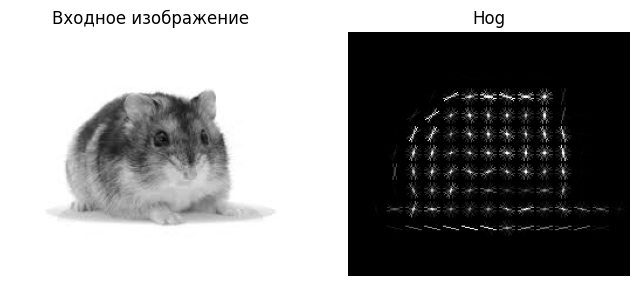

In [272]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(
    gray,
    orientations = 8,
    pixels_per_cell = (16,16),
    cells_per_block = (4,4),
    visualize = 'True')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4), sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(gray,cmap = plt.cm.gray)
ax1.set_title('Входное изображение')

hog_img_resc = exposure.rescale_intensity(hog_image,in_range=(0,12))
ax2.axis('off')
ax2.imshow(hog_img_resc,cmap = plt.cm.gray)
ax2.set_title('Hog')

plt.show()


In [273]:
img1 = list()
img2 = list()

for file in files_hamser:
    img1.append(cv2.imread(f'{input_path_hamser}/{file}'))
for file in files_smartphone:
    img2.append(cv2.imread(f'{input_path_smartphone}/{file}'))

images = img1 + img2

In [274]:
hog_img = []
hog_features = []
for image in images:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(300,150), interpolation=cv2.INTER_AREA)
    fd, hog_image = img2hog(resized)
    hog_img.append(hog_image)
    hog_features.append(fd)

In [275]:
labels1 = [1 for i in range(12)]
labels2 = [0 for i in range(12)]
hog_features = np.array(hog_features)
labels = np.array(labels1+labels2).reshape(24,1)
df = np.hstack((hog_features,labels))
np.random.shuffle(df)

In [276]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,...,11511,11512,11513,11514,11515,11516,11517,11518,11519,11520
0,0.005882,0.000000,0.006856,0.044298,0.149309,0.003009,0.005817,0.000000,0.008461,0.000652,...,0.028152,0.030585,0.025469,0.059593,0.109337,0.104190,0.052031,0.024740,0.022687,1.0
1,0.037616,0.024062,0.025412,0.015077,0.010670,0.000000,0.000000,0.000000,0.010827,0.004208,...,0.000000,0.001070,0.000000,0.029025,0.250182,0.135010,0.001197,0.000757,0.000000,0.0
2,0.122254,0.032302,0.095708,0.019836,0.062601,0.013250,0.087005,0.294664,0.007038,0.037479,...,0.003622,0.013383,0.004073,0.017853,0.002525,0.036854,0.013055,0.031990,0.018587,0.0
3,0.000000,0.000000,0.000000,0.000000,0.172258,0.000000,0.000000,0.000000,0.026915,0.000000,...,0.000000,0.001332,0.000000,0.000973,0.000000,0.041033,0.001192,0.001130,0.000843,1.0
4,0.018826,0.013055,0.035230,0.002408,0.013454,0.002838,0.007655,0.000000,0.016795,0.000568,...,0.010638,0.006527,0.005617,0.021580,0.050527,0.309666,0.266755,0.022588,0.005938,0.0
5,0.006529,0.002433,0.003972,0.000000,0.162674,0.012167,0.038724,0.003441,0.000000,0.000000,...,0.013224,0.019363,0.010817,0.017687,0.044260,0.292995,0.080349,0.029961,0.014837,1.0
6,0.168523,0.073524,0.089775,0.054949,0.038326,0.011531,0.022871,0.057053,0.034793,0.018699,...,0.027935,0.026629,0.002314,0.003459,0.015655,0.032968,0.049290,0.065885,0.031055,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
8,0.086090,0.009957,0.097582,0.000000,0.175148,0.006638,0.018892,0.000000,0.067276,0.013276,...,0.077118,0.037742,0.029490,0.022618,0.033956,0.117781,0.286857,0.182839,0.087189,1.0
9,0.001672,0.000000,0.001495,0.005404,0.056591,0.007280,0.013612,0.002751,0.004914,0.006023,...,0.011258,0.005318,0.002859,0.006655,0.004796,0.023230,0.038921,0.002221,0.001921,0.0


In [277]:
clf = svm.SVC()
oby4 = int(len(hog_features)*80/100)
 #Разделение данных на тренировочный и тестовый наборы
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train,x_test = df[:oby4,:-1], df[oby4:,:-1]
y_train, y_test = df[:oby4,-1:].ravel(), df[oby4:,-1:].ravel()

clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

In [278]:
print("Точность:" +str(accuracy_score(y_test,y_predict)))
print('\n')
print(classification_report(y_test,y_predict))

Точность:0.8


              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

